In [1583]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [1584]:
df = pd.read_csv('diabetes.csv')

In [1585]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1587]:
df.duplicated().sum()

0

In [1588]:
df[df['BMI']<12].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [1589]:
df[df['BloodPressure']<=0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [1590]:
d =df[df['Insulin']==0]
d[d['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
756,7,137,90,41,0,32.0,0.391,39,0
758,1,106,76,0,0,37.5,0.197,26,0
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0


In [1591]:
# d =df[df['Insulin']==0]
# k= d[d['Outcome']==0]
# ind =k.index[k['Glucose']>=125].tolist()
# for i in ind :
#     df.loc[i, 'Outcome'] = 1
df=df.drop(columns='Insulin',axis=1)

In [1592]:
df[df['DiabetesPedigreeFunction']<=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [1593]:
df[df['BloodPressure']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,35.3,0.134,29,0
15,7,100,0,0,30.0,0.484,32,1
49,7,105,0,0,0.0,0.305,24,0
60,2,84,0,0,0.0,0.304,21,0
78,0,131,0,0,43.2,0.270,26,1


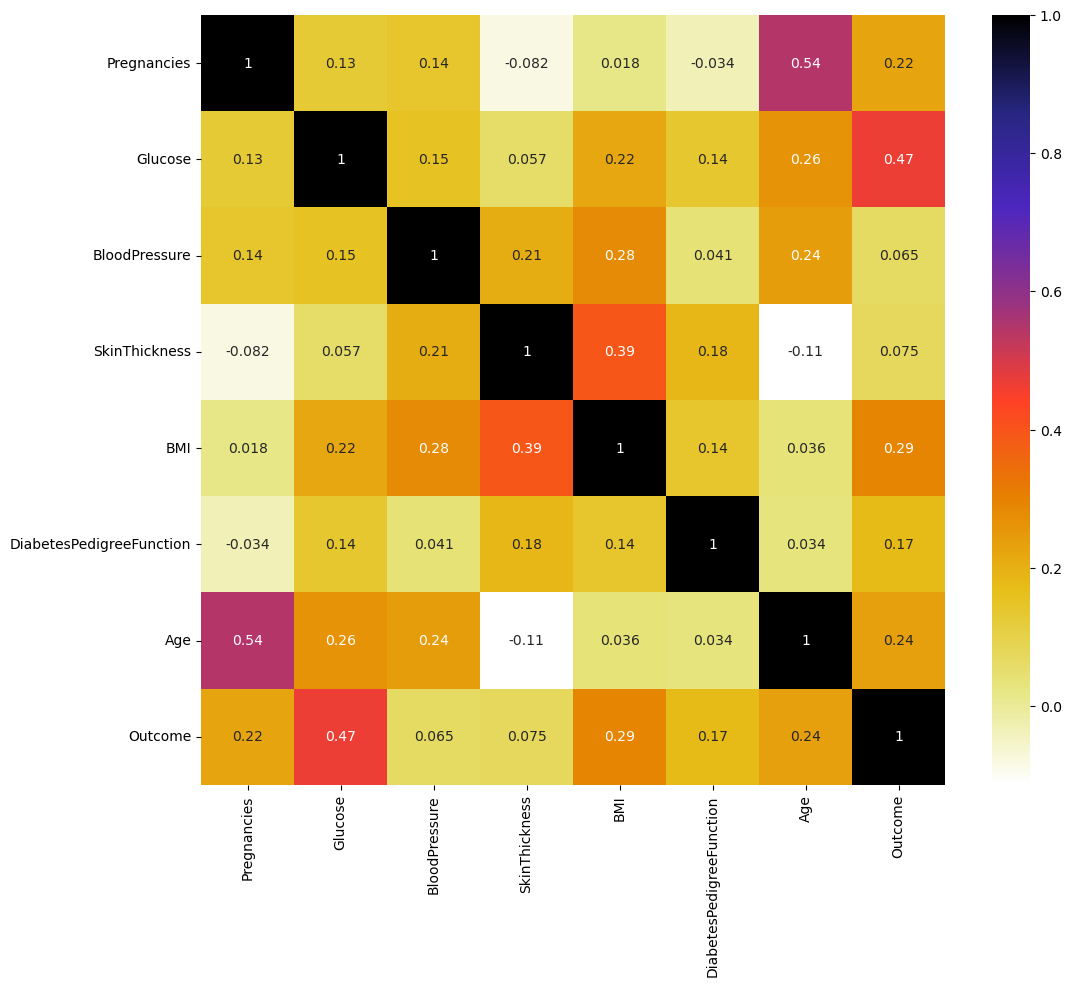

In [1594]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [1595]:
df = df.drop(columns=['SkinThickness','BloodPressure'],axis=1)
df.duplicated().sum()

0

In [1596]:
df.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


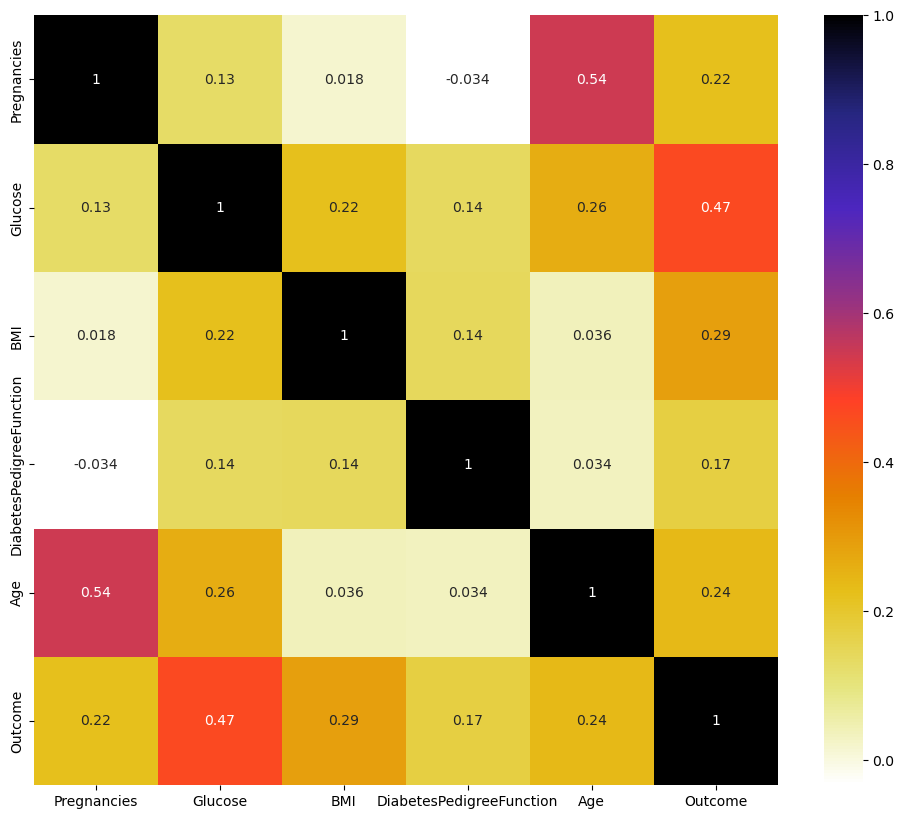

In [1597]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [1598]:
cols=['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age','Outcome']

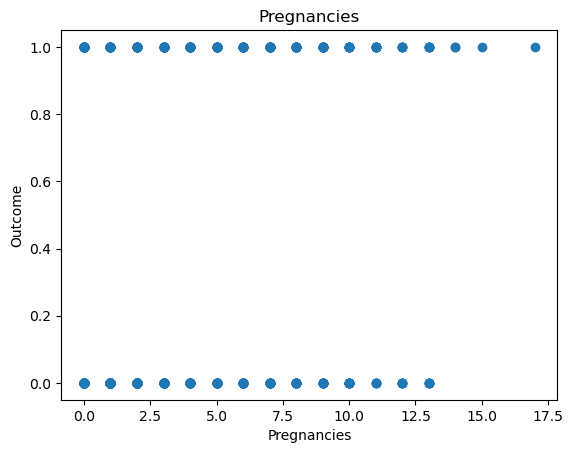

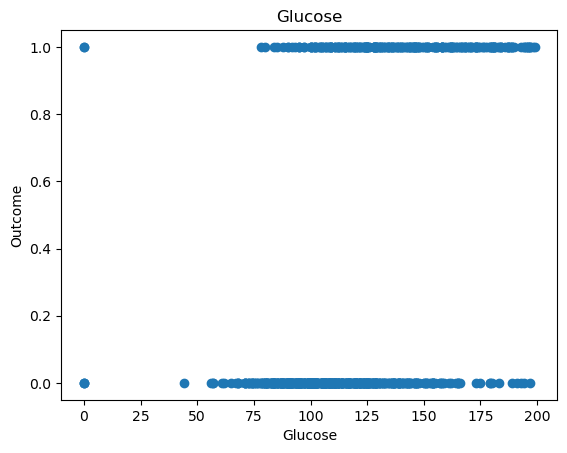

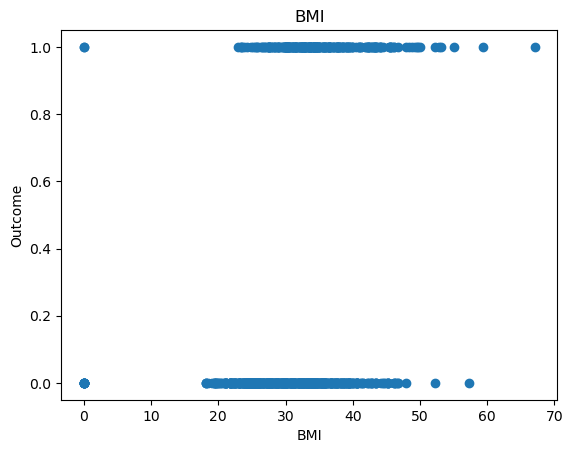

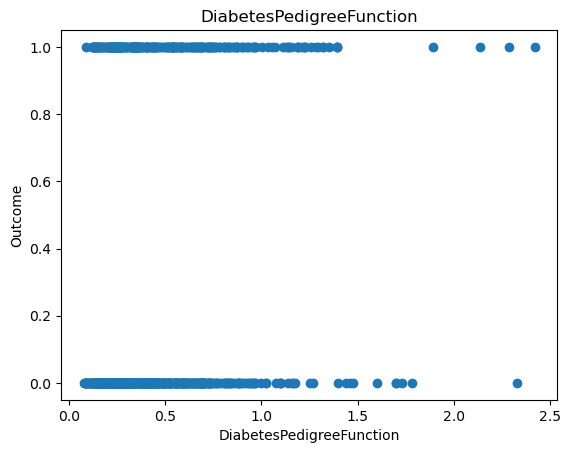

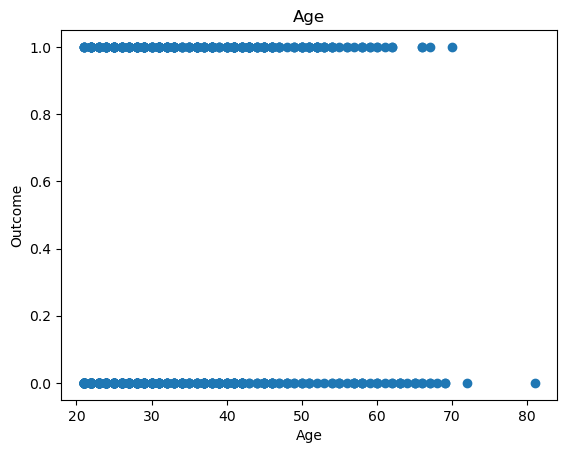

In [1599]:
for label in cols[:-1]:
    plt.scatter(df[label],df['Outcome'])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

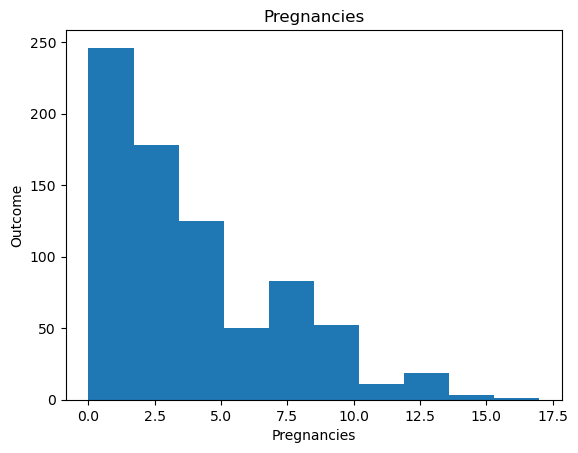

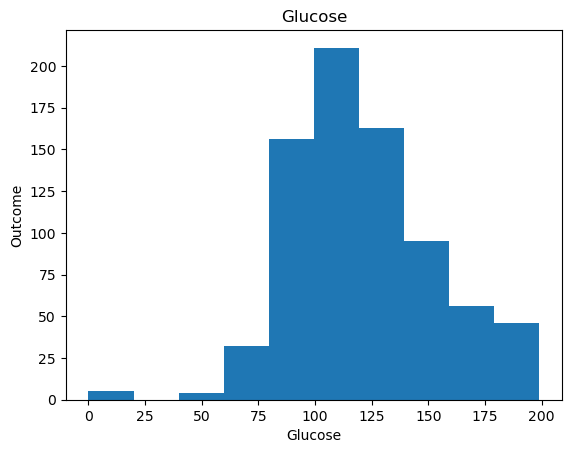

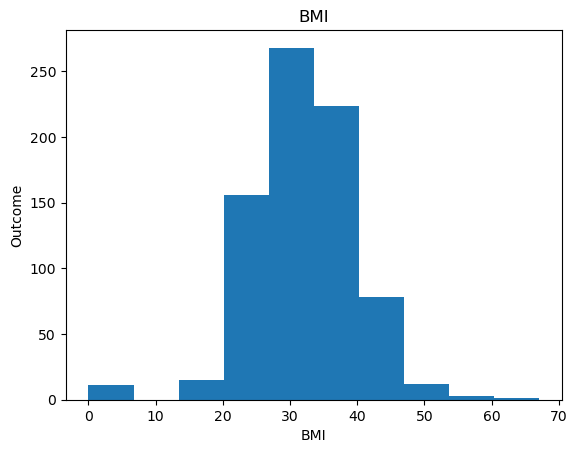

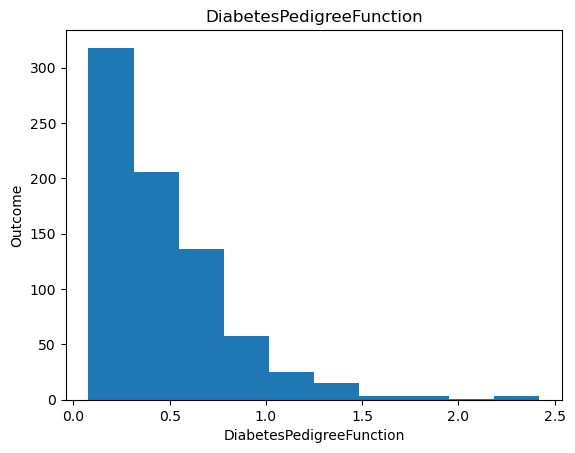

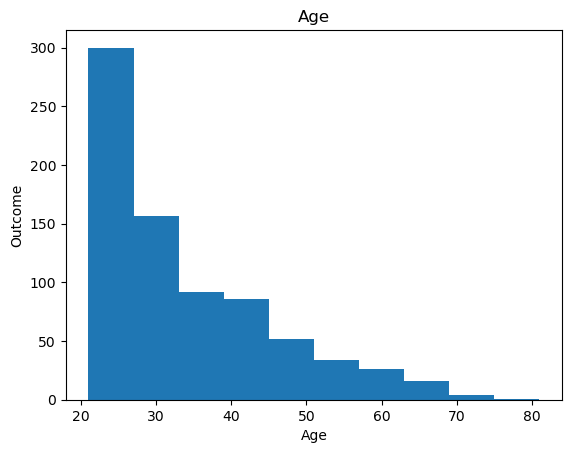

In [1600]:
for label in cols[:-1]:
    plt.hist(df[label])
    plt.title(label)
    plt.ylabel('Outcome')
    plt.xlabel(label)
    plt.show()

In [1601]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

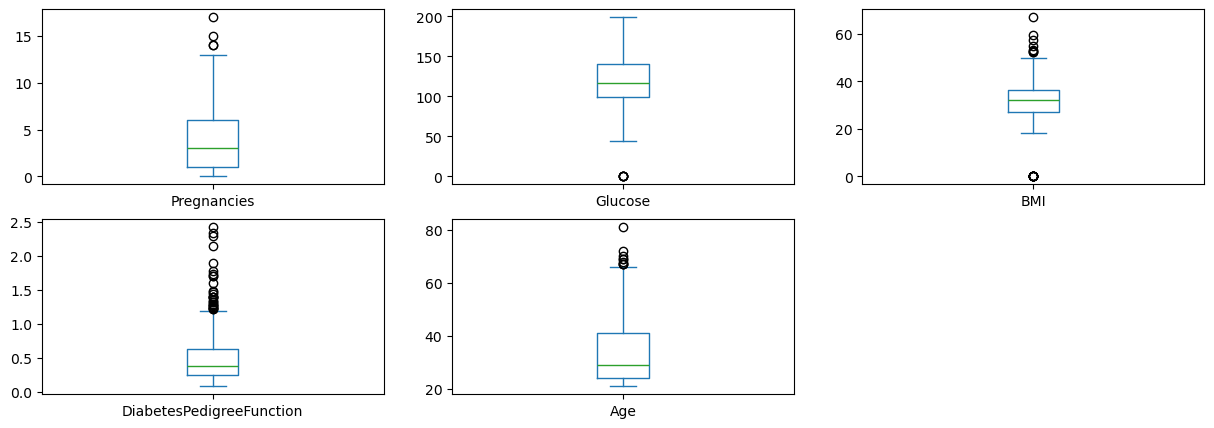

In [1602]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [1603]:
def clean_outlier(col,outlier,df ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df=df.drop(index=ind,axis=0)
    return df

In [1604]:
df = clean_outlier('Pregnancies',[14,15,17],df)
df = clean_outlier('Glucose',[0],df)
df = clean_outlier('BMI',[0],df)

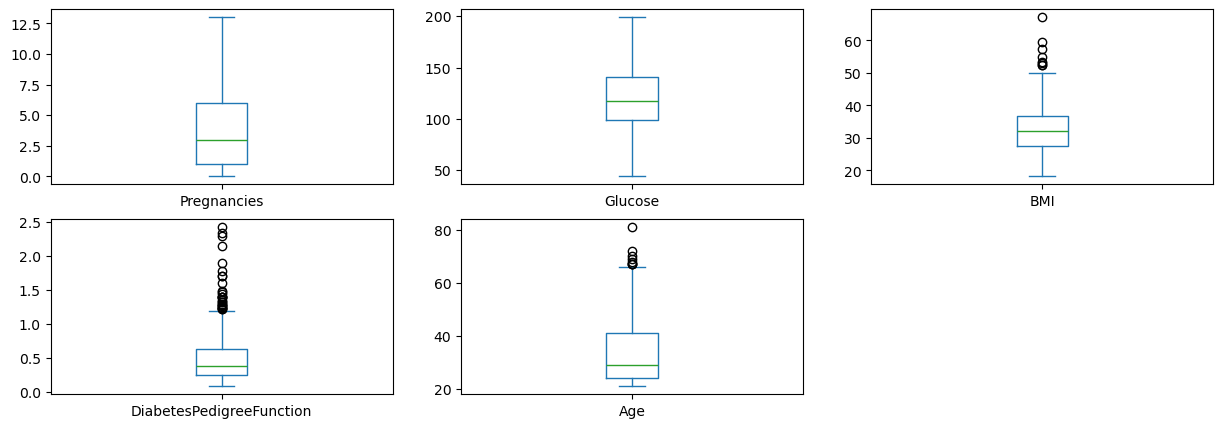

In [1605]:
for i in range(1,6):
    plt.subplot(2, 3, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [1606]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title('Histogram of '+feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title('Probability Plot of '+feature)
    plt.show()


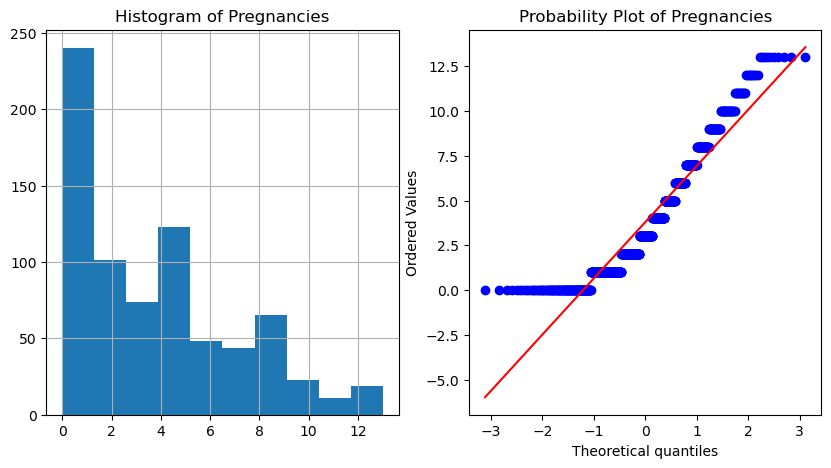

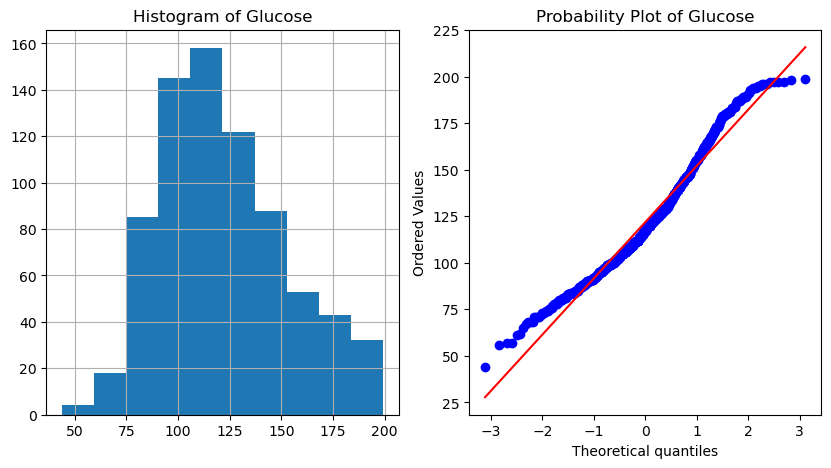

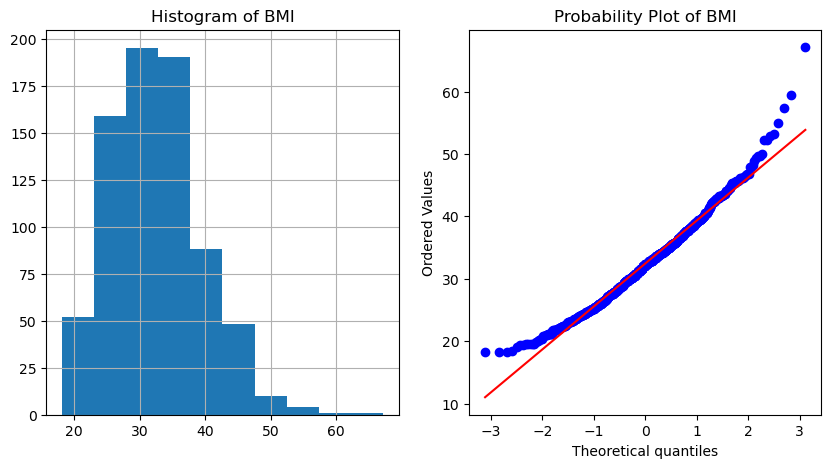

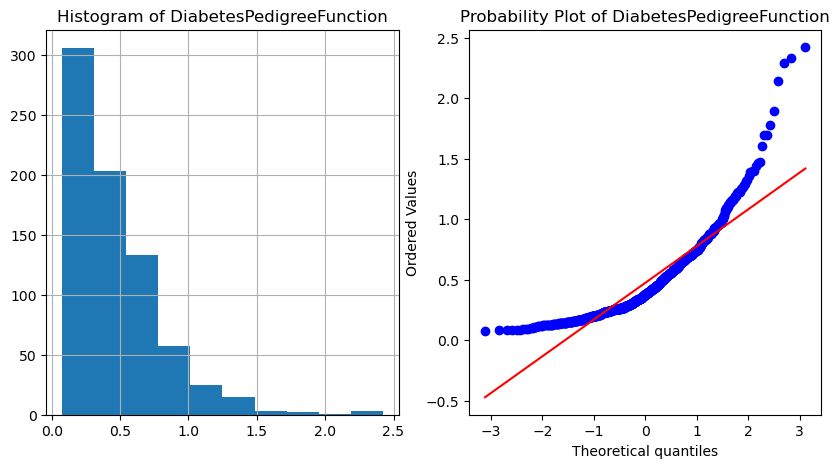

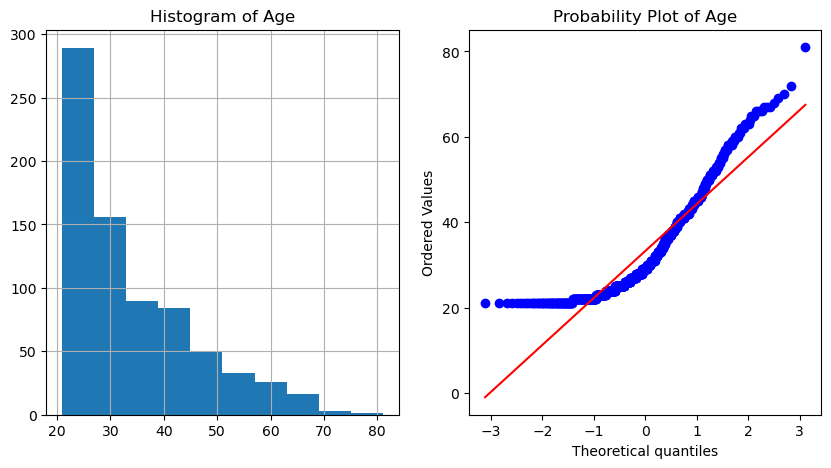

In [1607]:
for label in cols[:-1]:
    plot_data(df,label)

In [1608]:
data = df

In [1609]:
data['Age'] = np.log(df['Age'])

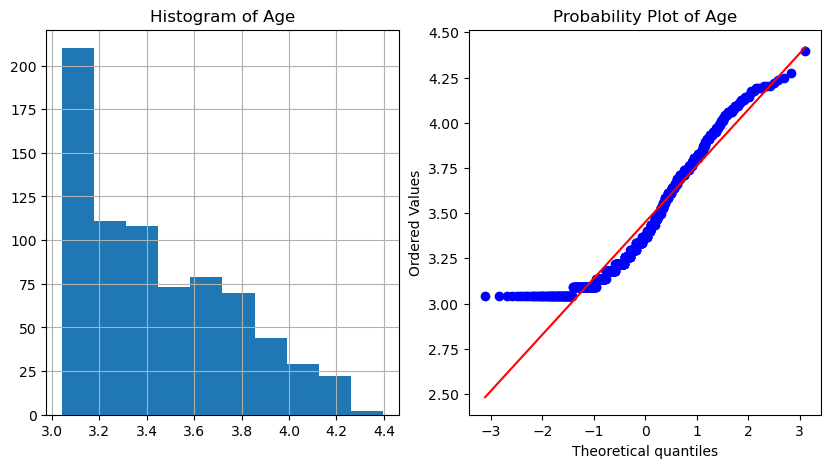

In [1610]:
plot_data(data,'Age')

In [1611]:
data['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])

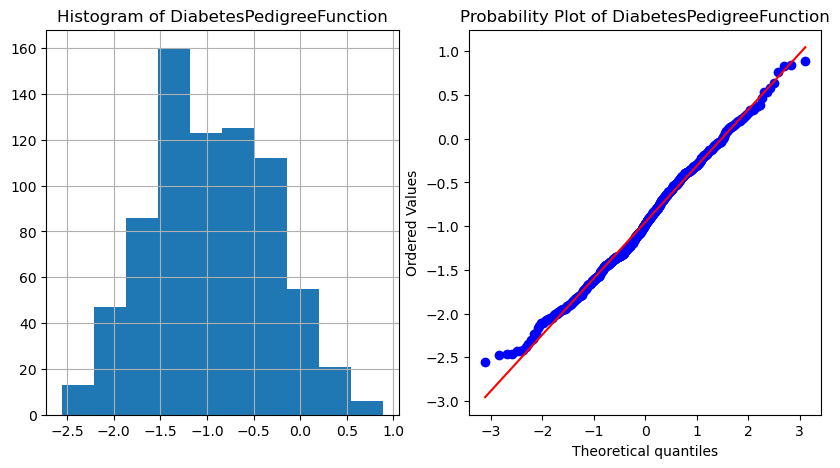

In [1612]:
plot_data(data,'DiabetesPedigreeFunction')

In [1613]:
data['BMI'] = np.log(df['BMI'])

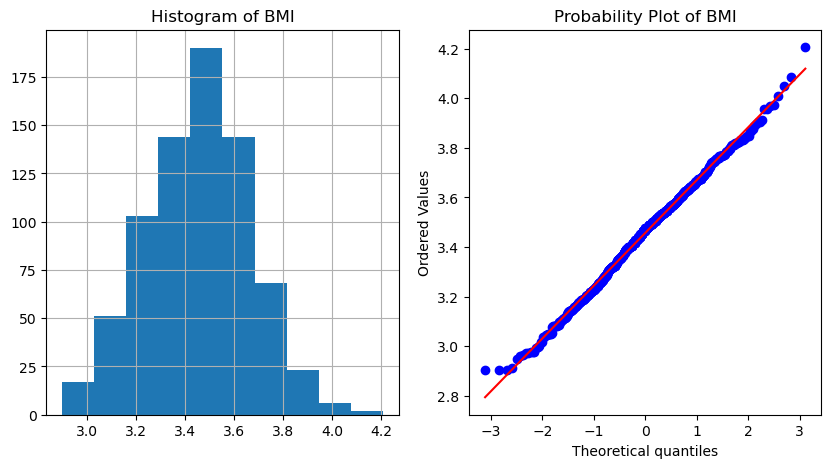

In [1614]:
plot_data(data,'BMI')

In [1615]:
data['Pregnancies'] = np.sqrt(df['Pregnancies'])

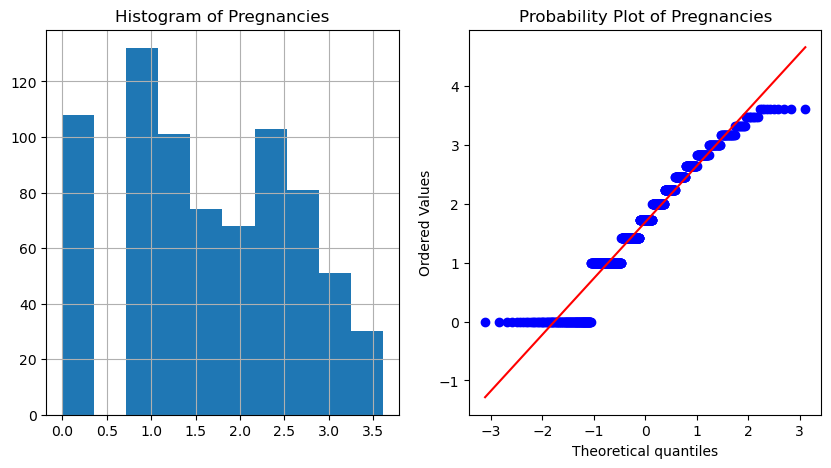

In [1616]:
plot_data(data,'Pregnancies')

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_7852\3709795234.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette = 'pastel')


<Axes: xlabel='Outcome', ylabel='count'>

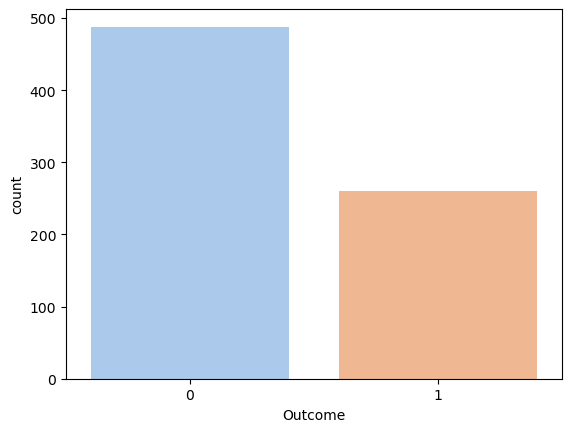

In [1617]:
sns.countplot(x='Outcome', data=data, palette = 'pastel')

In [1618]:
print(data.shape)
print(748/(0.3*748))

(748, 6)
3.333333333333333


In [1619]:
data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.449490,148,3.514526,-0.466809,3.912023,1
1,1.000000,85,3.280911,-1.046969,3.433987,0
2,2.828427,183,3.148453,-0.397497,3.465736,1
3,1.000000,89,3.335770,-1.789761,3.044522,0
4,0.000000,137,3.763523,0.827678,3.496508,1


In [1620]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
    data = np.hstack([x,np.reshape(y,(-1,1))])
    return data , x, y

In [1621]:
train,test = train_test_split(data,test_size=0.3)

In [1622]:
train,x_train,y_train = scale(train,True)
test,x_test,y_test = scale(test,False)

In [1623]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train,y_train)

In [1624]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       143
           1       0.70      0.77      0.73        82

    accuracy                           0.80       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.80      0.80       225



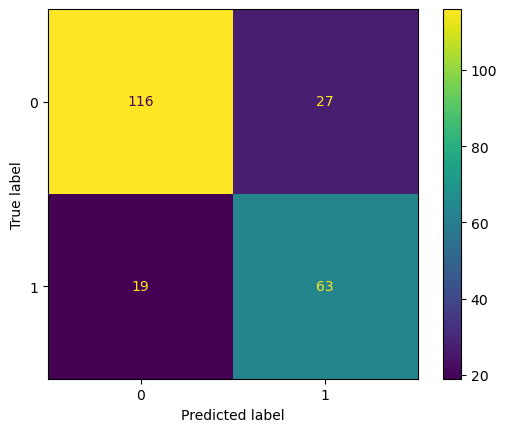

In [1625]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning fo Logistic**

In [1626]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

parameters = [
    {'solver': ['newton-cg', 'lbfgs', 'sag'], 
     'penalty': ['l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100], 
     'l1_ratio': [0.1, 0.5, 0.9]},
    
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100]},
]


lg = LogisticRegression()
grid_search = GridSearchCV(estimator = lg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)



# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [1627]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       143
           1       0.70      0.77      0.73        82

    accuracy                           0.80       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.80      0.80       225



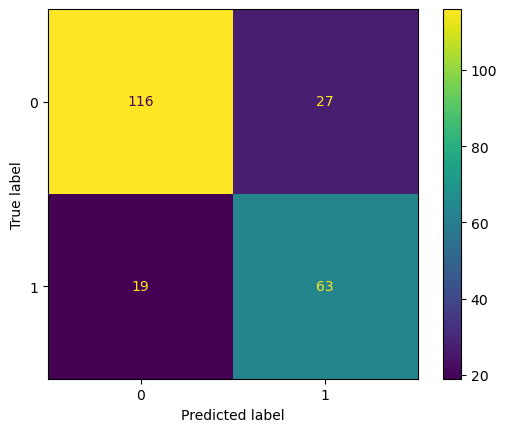

In [1628]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1629]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [1630]:
y_pre = svm_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       143
           1       0.69      0.90      0.78        82

    accuracy                           0.82       225
   macro avg       0.81      0.84      0.81       225
weighted avg       0.84      0.82      0.82       225



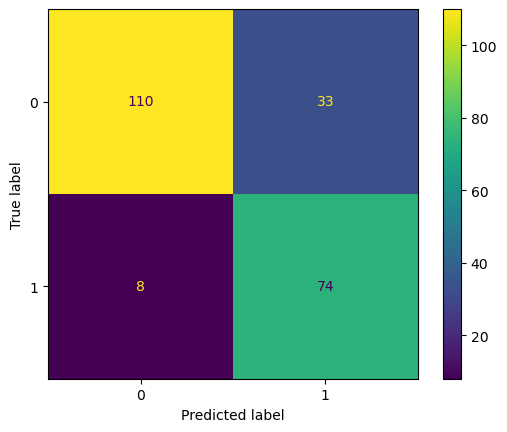

In [1631]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### **Tuning for SVC**

In [1632]:
parameters = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]  # Kernel coefficient
}
svc = SVC()
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
# Fit the model
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [1634]:
y_pre = lg_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       143
           1       0.70      0.77      0.73        82

    accuracy                           0.80       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.80      0.80       225



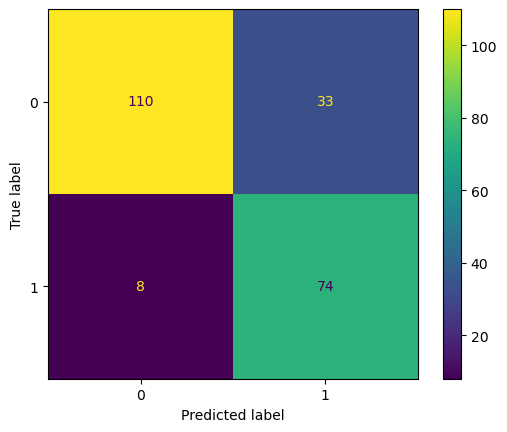

In [1633]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1635]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [1636]:
y_pre = nb_model.predict(x_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       143
           1       0.69      0.78      0.73        82

    accuracy                           0.79       225
   macro avg       0.78      0.79      0.78       225
weighted avg       0.80      0.79      0.79       225



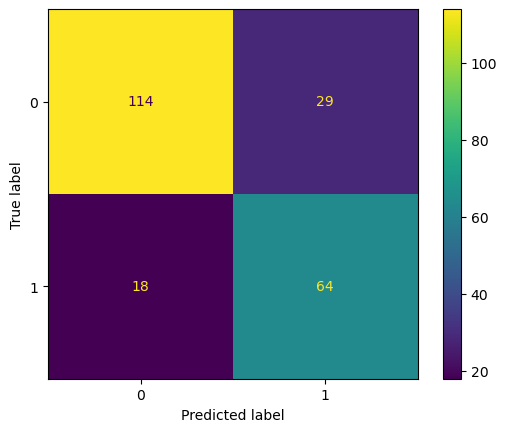

In [1637]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pre)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [1638]:

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [1639]:
y_pre = rf_regressor.predict(x_test)
y_pre
# print(classification_report(y_test, y_pre))

array([0.42, 0.77, 0.37, 0.02, 0.04, 0.73, 0.46, 0.  , 0.36, 0.  , 0.04,
       0.85, 0.28, 0.08, 0.18, 0.17, 0.14, 0.16, 0.24, 0.6 , 0.8 , 0.73,
       0.06, 0.97, 0.84, 0.39, 0.5 , 0.2 , 0.56, 0.05, 0.39, 0.  , 0.48,
       0.55, 0.95, 0.9 , 0.65, 0.03, 0.38, 0.75, 0.11, 0.77, 0.  , 0.02,
       0.99, 0.88, 0.  , 0.23, 0.73, 0.88, 0.07, 0.84, 0.26, 0.28, 0.61,
       0.68, 0.9 , 0.14, 0.14, 0.09, 0.67, 0.32, 0.63, 0.01, 0.84, 0.45,
       0.4 , 0.23, 0.74, 0.79, 0.09, 0.51, 0.51, 0.01, 0.71, 0.45, 0.43,
       0.03, 0.23, 0.05, 0.05, 0.06, 0.03, 0.17, 0.39, 0.78, 0.97, 0.66,
       0.82, 0.71, 0.88, 0.74, 0.03, 0.67, 0.52, 0.85, 0.38, 0.24, 0.66,
       0.33, 0.1 , 0.51, 0.65, 0.39, 0.14, 0.63, 0.93, 0.55, 0.8 , 0.36,
       0.6 , 0.69, 0.13, 0.  , 0.47, 0.63, 0.82, 0.89, 0.89, 0.13, 0.01,
       0.07, 0.74, 0.56, 0.02, 0.  , 0.6 , 0.33, 0.  , 0.  , 0.38, 0.24,
       0.36, 0.01, 0.65, 0.  , 0.47, 0.03, 0.  , 0.  , 0.35, 0.52, 0.  ,
       0.1 , 0.2 , 0.01, 0.05, 0.02, 0.06, 0.33, 0.